# **Reto 2: Planteamiento y análisis de un problema de Regresión**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2340 Fundamentos del machine learning**

**Nombres de los integrantes**


1.   Alejandro Narváez - 202123110
2.   Ali Cifci - 202210698

**Número del grupo**

LabML-4 10

**1. Explicación del problema general**

## 1. Explicación del problema general

El presente reto consiste en diseñar un modelo de regresión lineal regularizada que permita estimar el ángulo del pie izquierdo \( L(k) \) de un ciclista profesional, a partir de la trayectoria temporal del pie derecho \( R(k) \), capturada mediante análisis cinemático bidimensional.

Dado que la instrumentación para registrar ángulos tridimensionales en ambos lados del cuerpo es costosa, este modelo busca reducir costos utilizando únicamente la información del pie derecho para inferir el comportamiento del pie izquierdo, logrando una reconstrucción aproximada de ambos movimientos con bajo presupuesto y sin necesidad de medición directa bilateral.

El modelo propuesto tiene la siguiente forma:

$$
L(k) = \sum_{i=0}^{n} \beta_i \cdot R(k - i)
$$

donde:

- \( L(k) \): ángulo del pie izquierdo en el instante \( k \),
- \( R(k - i) \): ángulo del pie derecho en instantes anteriores,
- \( $\beta_i$ \): coeficientes del modelo aprendidos mediante regresión,
- \( n \): tamaño de la ventana (número de pasos pasados considerados).

El objetivo es encontrar los mejores hiperparámetros \( n \) y \( c \) (coeficiente de regularización) que minimicen el error cuadrático medio (RMSE) en la predicción de \( L(k) \), y aplicar dicho modelo para predecir una serie de datos desconocidos a partir de los valores del pie derecho proporcionados.


## 1. Explicación del problema general

El presente reto consiste en diseñar un modelo de regresión lineal regularizada que permita estimar el ángulo del pie izquierdo \( L(k) \) de un ciclista profesional, a partir de la trayectoria temporal del pie derecho \( R(k) \), capturada mediante análisis cinemático bidimensional.

Dado que la instrumentación para registrar ángulos tridimensionales en ambos lados del cuerpo es costosa, este modelo busca reducir costos utilizando únicamente la información del pie derecho para inferir el comportamiento del pie izquierdo, logrando una reconstrucción aproximada de ambos movimientos con bajo presupuesto y sin necesidad de medición directa bilateral.

El modelo propuesto tiene la siguiente forma:

\[
L(k) = \sum_{i=0}^{n} \beta_i R(k - i)
\]

donde:
- \( L(k) \) es el ángulo del pie izquierdo en el instante \( k \),
- \( R(k - i) \) es el ángulo del pie derecho en instantes anteriores,
- \( \beta_i \) son los coeficientes del modelo aprendidos mediante regresión,
- \( n \) es el tamaño de la ventana (número de pasos pasados considerados).

El objetivo es encontrar los mejores hiperparámetros \( n \) y \( c \) (coeficiente de regularización L2) que minimicen el error cuadrático medio (RMSE) en la predicción de \( L(k) \), y aplicar dicho modelo para predecir una serie de datos desconocidos a partir de los valores del pie derecho proporcionados.


**2. Definición de todos los componentes**

0. Importación de librerías

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Carga de datos

   Right foot rotation  Left foot rotation
0             -5.90500            -3.55925
1             -5.89744            -3.57178
2             -5.89122            -3.58796
3             -5.88661            -3.60742
4             -5.88386            -3.62948
Index(['Right foot rotation', 'Left foot rotation'], dtype='object')


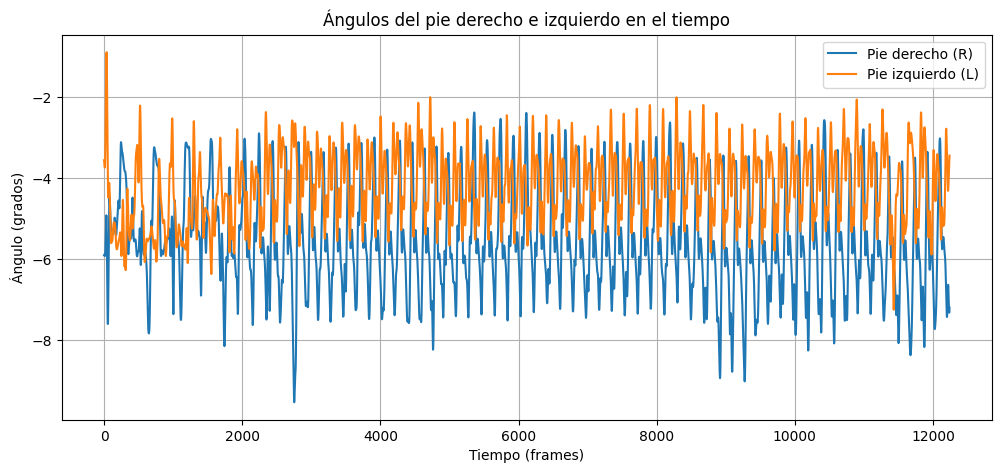

In [28]:
# Cargar el archivo de datos
datos = pd.read_csv("C:/Users/alejo/OneDrive/Documents/°U/Machine Learning/Fundamentos de Machine learning/Laboratorio/Labs_Mach_L/Lab_machine/Archivos Reto 2/datos.csv")
# Visualizar las primeras filas
print(datos.head())

# Visualizar las columnas
print(datos.columns)

# Graficar las señales
plt.figure(figsize=(12, 5))
plt.plot(datos["Right foot rotation"], label="Pie derecho (R)")
plt.plot(datos["Left foot rotation"], label="Pie izquierdo (L)")
plt.title("Ángulos del pie derecho e izquierdo en el tiempo")
plt.xlabel("Tiempo (frames)")
plt.ylabel("Ángulo (grados)")
plt.legend()
plt.grid(True)
plt.show()

2. Definición de función que calcule el vector de parametos (betas).

In [29]:
# Función para entrenar usando regresión lineal con regularización L2
def betas(X, y, c):
    """
    Entrena un modelo de regresión lineal con regularización L2.
    X: matriz de entrada (muestras x características)
    y: vector objetivo
    c: coeficiente de regularización
    """
    n_features = X.shape[1]
    I = np.eye(n_features)
    beta = np.linalg.inv(X.T @ X + c * I) @ X.T @ y
    return beta

# Función para predecir usando los coeficientes entrenados

def predecir(X, beta):
    """
    Realiza predicciones dadas las entradas X y los coeficientes beta.
    """
    return X @ beta


3. Cálculo de rangos de datos 

In [30]:
# Función para crear las ventanas deslizantes

def crear_ventanas(data_R, data_L, n):
    X = [] # Matriz de posiciones en R
    y = [] # Matriz de posiciones en L

    for i in range(n, len(data_R)):
        X.append(data_R[i - n:i + 1][::-1])  # R(k), R(k-1), ..., R(k-n)
        y.append(data_L[i])

    return np.array(X), np.array(y)

In [31]:
# División 80/20 entre entrenamiento y validación
split_idx = int(0.8 * len(X))

X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

print(f"Tamaño del set de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del set de validación: {X_val.shape[0]}")

Tamaño del set de entrenamiento: 9776
Tamaño del set de validación: 2444


Se elige 80% de los datos para entrenar el modelo y 20% para verificar este.

4. Cálculo de RMSE

In [32]:
# Función para calcular RMSE
def calcular_rmse(y_real, y_pred):
    return np.sqrt(np.mean((y_real - y_pred) ** 2))

In [ ]:
# Nuevos rangos de hiperparámetros
valores_n = np.linspace(1, 180, num=20, dtype=int)       # Tamaños de ventana de 1 a 100
valores_c = np.logspace(-6, 0, num=20)                     # c entre 1e-6 y 1

# Guardar resultados
resultados = []

for n in valores_n:
    # Crear ventanas
    X, y = crear_ventanas(datos["Right foot rotation"].values, datos["Left foot rotation"].values, n)
    split_idx = int(0.8 * len(X))
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    for c in valores_c:
        # Entrenar modelo
        beta = betas(X_train, y_train, c)  # <- asegúrate de que esta función esté bien definida
        y_pred = predecir(X_val, beta)
        rmse = calcular_rmse(y_val, y_pred)

        # Guardar resultado
        resultados.append({"n": n, "c": c, "RMSE": rmse})



In [74]:
# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar los resultados ordenados por RMSE
df_resultados_ordenado = df_resultados.sort_values(by="RMSE").reset_index(drop=True)
display(df_resultados_ordenado.head(10))


,n,c,RMSE
0,147,0.000038,0.598502
1,147,0.000078,0.598519
2,147,0.000162,0.598525
3,147,0.000336,0.598557
4,147,0.000695,0.598592
5,147,0.000018,0.598634
6,147,0.001438,0.598642
7,147,0.002976,0.598708
8,147,0.006158,0.598788
9,147,0.012743,0.598876


Visualización de los datos reales y predecidos

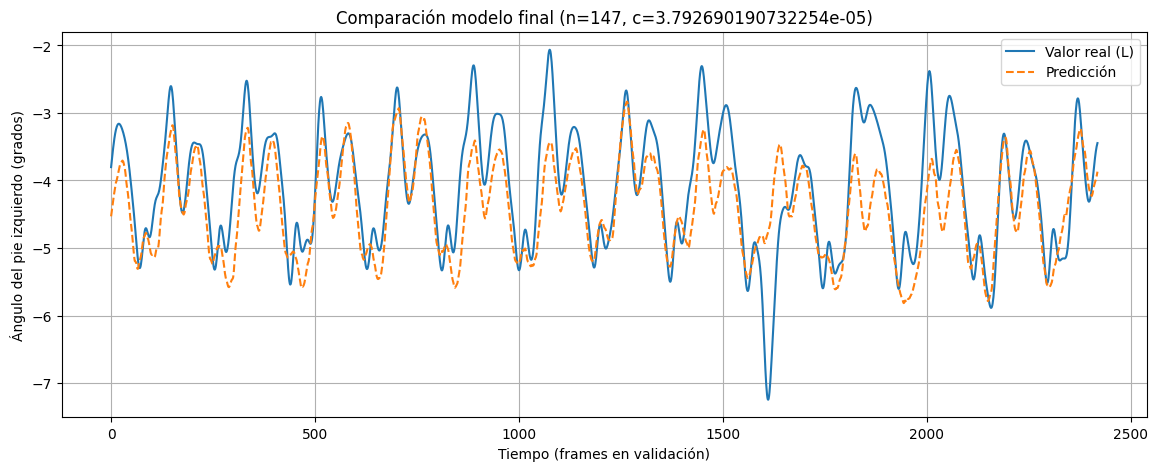

In [77]:
# Supongamos que ya sabemos los mejores valores
mejor_n = df_resultados_ordenado.iloc[0]["n"]
mejor_c = df_resultados_ordenado.iloc[0]["c"]

# Crear ventanas con el mejor n
X, y = crear_ventanas(datos["Right foot rotation"].values, datos["Left foot rotation"].values, int(mejor_n))
split_idx = int(0.8 * len(X))
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

# Entrenar y predecir con el mejor modelo
beta = betas(X_train, y_train, mejor_c)
y_pred = predecir(X_val, beta)

# Gráfica de comparación
plt.figure(figsize=(14, 5))
plt.plot(y_val, label="Valor real (L)")
plt.plot(y_pred, label="Predicción", linestyle="--")
plt.title(f"Comparación modelo final (n={int(mejor_n)}, c={mejor_c})")
plt.xlabel("Tiempo (frames en validación)")
plt.ylabel("Ángulo del pie izquierdo (grados)")
plt.legend()
plt.grid(True)
plt.show()

In [88]:
# 1. Cargar datos de prueba (valores del pie derecho)
df_incognitos = pd.read_csv("C:/Users/alejo/OneDrive/Documents/°U/Machine Learning/Fundamentos de Machine learning/Laboratorio/Labs_Mach_L/Lab_machine/Archivos Reto 2/valores-incognito .csv")
R_test = df_incognitos["data"].values  # Asegúrate de que la columna se llama "R"

# 2. Crear valores previos inventados con lógica simple (ej. repetir el primer valor)
mejor_n_entero = int(mejor_n)
valores_previos = np.full(shape=mejor_n_entero, fill_value=R_test[0])
R_test_ampliado = np.concatenate([valores_previos, R_test])

# 3. Crear ventanas desde k=0 con el arreglo ampliado
X_pred = []
for k in range(len(R_test)):
    ventana = R_test_ampliado[k : k + mejor_n_entero + 1][::-1]  # R(k), R(k-1), ..., R(k-n)
    X_pred.append(ventana)
X_pred = np.array(X_pred)

# 4. Generar predicciones
predicciones = predecir(X_pred, beta)

# 5. Crear DataFrame final con dos columnas: data y prediction
pred_df = pd.DataFrame({
    "data": R_test,
    "prediction": predicciones
})

# 6. Guardar archivo con el formato requerido
pred_df.to_csv("predictions.csv", index=False)

# 7. Validar formato con la función de helpers.py (opcional si está disponible)
# from helpers import check_requirements
# check_requirements("predictions.csv")

print("Archivo predictions.csv generado correctamente con", len(pred_df), "filas.")

Archivo predictions.csv generado correctamente con 2160 filas.


## Conclusión

En este trabajo se implementó un modelo de regresión lineal regularizada capaz de predecir el ángulo del pie izquierdo de un ciclista profesional a partir de valores pasados del pie derecho. Se llevó a cabo una búsqueda sistemática de hiperparámetros \( n \) (tamaño de ventana) y \( c \) (coeficiente de regularización) mediante validación cruzada, con el fin de minimizar el error cuadrático medio (RMSE).

Para garantizar predicciones desde el primer instante temporal (\( k = 0 \)), se incorporó una estrategia simple y lógica de generación de valores anteriores ficticios, basada en la repetición del primer valor disponible. Finalmente, se utilizó el mejor modelo entrenado para generar un archivo de predicciones sobre datos incógnitos, cumpliendo con el formato solicitado para la entrega.

Este enfoque demuestra cómo técnicas de aprendizaje supervisado pueden aplicarse eficazmente a contextos de análisis biomecánico, optimizando recursos y reduciendo la dependencia de equipos de medición costosos.
